# The Battle of the Neighborhoods

## Download and Explore Farmers Market dataset

In [ ]:
# library to handle data in a vectorized manner
import numpy as np 
# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# library to handle JSON files
import json 
 # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy --yes
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 
# library to handle requests
import requests 
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns
# uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge folium=0.5.0 --yes 
# map rendering library
import folium 
# implements classes to read and write tabular data in CSV form
import csv 
print('Libraries imported.')

Solving environment: | 

In [2]:
# Explore and download data
!wget -q -O newyork_farmer_data.json https://data.cityofnewyork.us/resource/8vwk-6iz2.json
print('Data downloaded!')

Data downloaded!


In [3]:
# Reading Farmer's Json File
df=pd.read_json('newyork_farmer_data.json') 
df.to_csv('NY_FARMER.csv') 

In [4]:
# Tranform the data into a pandas dataframe 
my_file='NY_FARMER.csv'
NY_FARMKT=pd.read_csv(my_file)
NY_FARMKT.head()

,Unnamed: 0,borough,marketname,streetaddress,latitude,longitude,daysoperation,hoursoperations,seasondates,accepts_ebt,open_year_round,nyc_dept_of_health_cooking,kids,location_point,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,0,Brooklyn,Woodhull Hospital Youthmarket,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"{'latitude': '40.700726', 'longitude': '-73.94...",17213,36,2,30,56
1,1,Manhattan,Mount Sinai Hospital Greenmarket,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"{'latitude': '40.789169', 'longitude': '-73.95...",12426,7,4,35,14
2,2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"{'latitude': '40.839882', 'longitude': '-73.91...",10930,50,5,42,27
3,3,Manhattan,Greenmarket at Oculus Plaza,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"{'latitude': '40.711535', 'longitude': '-74.01...",11728,56,4,32,1
4,4,Queens,Ditmars Park Youthmarket,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"{'latitude': '40.772854', 'longitude': '-73.90...",16862,39,3,4,72


In [5]:
# define the dataframe columns
#NY_FARMKT.columns = ['Service_Type']
NY_FARMKT['Service_Type'] = 'Farmers Markets'
NY_FARMKT.drop(['daysoperation','hoursoperations','seasondates','accepts_ebt','open_year_round','nyc_dept_of_health_cooking','kids','location_point','Unnamed: 0'], axis=1, inplace=True)
NY_FARMKT.drop([':@computed_region_efsh_h5xi',':@computed_region_f5dn_yrer',':@computed_region_yeji_bk3q',':@computed_region_92fq_4b7q',':@computed_region_sbqj_enih'], axis=1, inplace=True)

NY_FARMKT.head()

,borough,marketname,streetaddress,latitude,longitude,Service_Type
0,Brooklyn,Woodhull Hospital Youthmarket,Broadway & Flushing Ave,40.700726,-73.941932,Farmers Markets
1,Manhattan,Mount Sinai Hospital Greenmarket,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Farmers Markets
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Farmers Markets
3,Manhattan,Greenmarket at Oculus Plaza,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Farmers Markets
4,Queens,Ditmars Park Youthmarket,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Farmers Markets


In [6]:
# Data Insight 
print(NY_FARMKT.shape)
print(NY_FARMKT.Service_Type.unique())

(138, 6)
['Farmers Markets']


In [7]:
# Farmer's Market in each borough
NY_FARMKT.groupby('borough')['Service_Type'].count().sort_values(ascending=False)

borough
Brooklyn         44
Manhattan        41
Bronx            27
Queens           22
Staten Island     4
Name: Service_Type, dtype: int64

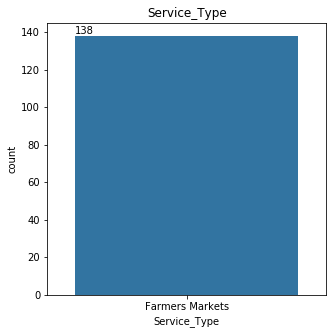

In [8]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Service_Type',data=NY_FARMKT)
ax.set_title("Service_Type")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show()

In [9]:
# NY_FARMKT_filtered - Dataset with only Farmers Market
NY_FARMKT_filtered = NY_FARMKT[NY_FARMKT['Service_Type'] == 'Farmers Markets'].copy()
NY_FARMKT_filtered ['Borough'] = NY_FARMKT_filtered['borough'].map(lambda x: x.strip())
print(NY_FARMKT_filtered.shape)
NY_FARMKT_filtered.head()

(138, 7)


,borough,marketname,streetaddress,latitude,longitude,Service_Type,Borough
0,Brooklyn,Woodhull Hospital Youthmarket,Broadway & Flushing Ave,40.700726,-73.941932,Farmers Markets,Brooklyn
1,Manhattan,Mount Sinai Hospital Greenmarket,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Farmers Markets,Manhattan
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Farmers Markets,Bronx
3,Manhattan,Greenmarket at Oculus Plaza,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Farmers Markets,Manhattan
4,Queens,Ditmars Park Youthmarket,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Farmers Markets,Queens


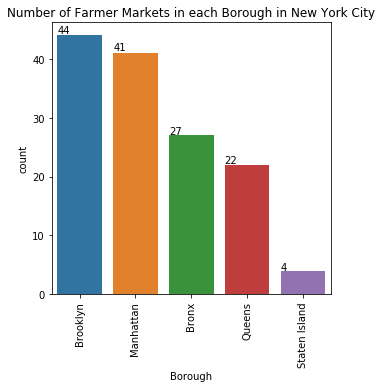

In [10]:
# Chart title
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=NY_FARMKT_filtered)
ax.set_title("Number of Farmer Markets in each Borough in New York City")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

## Manhattan amd Brooklyn have highest numbers of Farmers Markets

In [11]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="pks_user")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [1]:
# Create a map of New York with Facility name and Borough of Farmers Market superimposed on top
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, FacilityName, borough in zip(NY_FARMKT_filtered['latitude'], NY_FARMKT_filtered['longitude'], NY_FARMKT_filtered['marketname'], NY_FARMKT_filtered['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=2,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  
map_markets

NameError: name 'folium' is not defined

# Manhattan and Brooklyn have highest numbers of Farmers Markets
# Staten Island has few farmer markets, Queens has only 22 farmer market for largest borough in term of area